 The object of the popular casino card game of blackjack is to obtain cards the sum of whose numerical values is as great as possible without exceeding 21. All face cards count as 10, and an ace can count either as 1 or as 11. We consider the version in which each player competes independently against the dealer. The game begins with two cards dealt to both dealer and player. One of the dealer’s cards is face up and the other is face down. If the player has 21 immediately (an ace and a 10-card), it is called a natural. He then wins unless the dealer also has a natural, in which case the game is a draw. If the player does not have a natural, then he can request additional cards, one by one (hits), until he either stops (sticks) or exceeds 21 (goes bust). If he goes bust, he loses; if he sticks, then it becomes the dealer’s turn. The dealer hits or sticks according to a ﬁxed strategy without choice: he sticks on any sum of 17 or greater, and hits otherwise. If the dealer goes bust, then the player wins; otherwise, the outcome—win, lose, or draw—is determined by whose ﬁnal sum is closer to 21. 

In [1]:
# import numpy as np
# import matplotlib
# matplotlib.use('Agg')
# import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

import pandas as pd 

import sys
import random
import operator

from collections import defaultdict

from time import process_time 
from IPython.display import clear_output



# import matplotlib
import numpy as np
import pandas as pd
from collections import namedtuple

from lib import plotting

In [2]:

num_episodes=20000
# actions: hit or stand

In [3]:
from agents import mc_off_policy

In [7]:
# Start the stopwatch / counter  
t1_start = process_time() 

agent_MonteCarloAgent = mc_off_policy.MonteCarloAgent()
agent_MonteCarloAgent.actions = [0,1]
agent_MonteCarloAgent.initialize_state_actions( ) 


 
for i_episode in range(num_episodes):
    if i_episode % 100 == 0:
        print("\rEpisode {}/{}.".format(i_episode, num_episodes), end="")
        sys.stdout.flush()
    agent_MonteCarloAgent.control()
    

    

    
t1_stop = process_time() 
   
print("Elapsed time:", t1_stop, t1_start) 
print("Elapsed time during the whole program in seconds:", 
                                         t1_stop-t1_start) 

agent_MonteCarloAgent.save('model_output/final_MC_off_vals_50K.pkl')

agent_MonteCarloAgent.load('model_output/final_MC_off_vals_50K.pkl')

Episode 199900/200000.Elapsed time: 2474.0 1.703125
Elapsed time during the whole program in seconds: 2472.296875


In [6]:
V_MonteCarloAgent_50k =agent_MonteCarloAgent.Q_vals

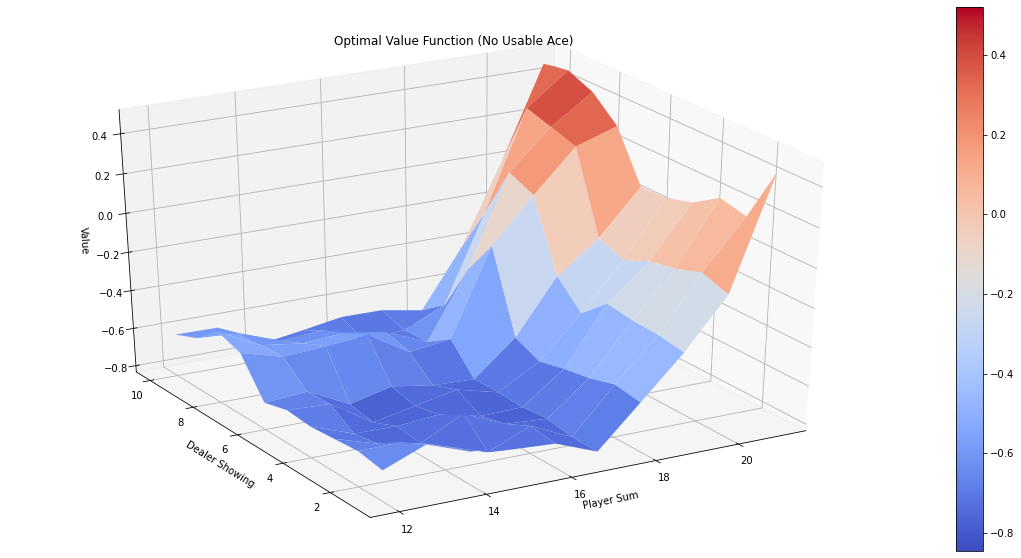

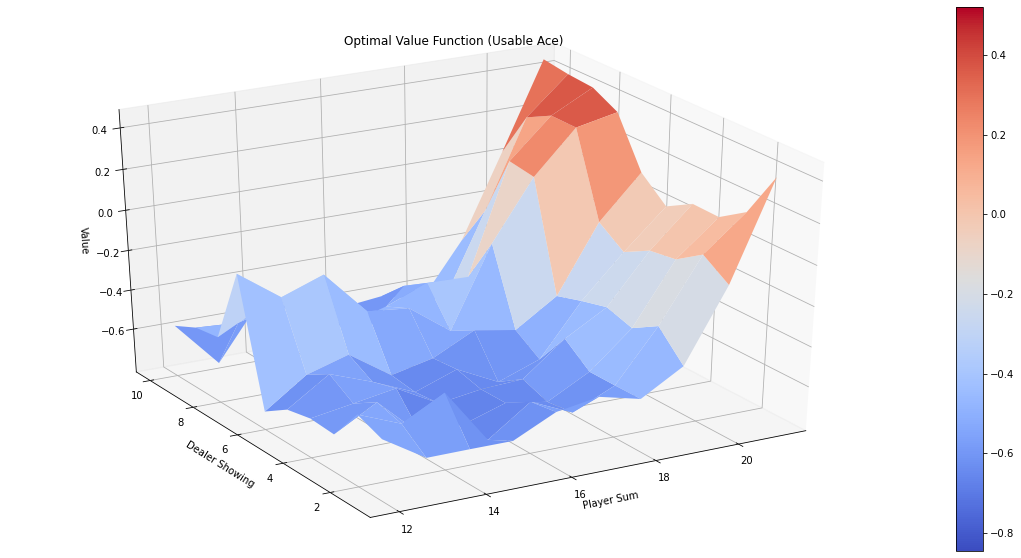

In [7]:
V = defaultdict(float)
for state, actions in V_MonteCarloAgent_50k.items():  
    action_value = np.max( list(actions.values()))
    V[state] = action_value

plotting.plot_value_function(V, title="Optimal Value Function")

In [8]:
policy = dict((state,  np.argmax( list(action.values()))) for state, action in agent_MonteCarloAgent.Q_vals.items())


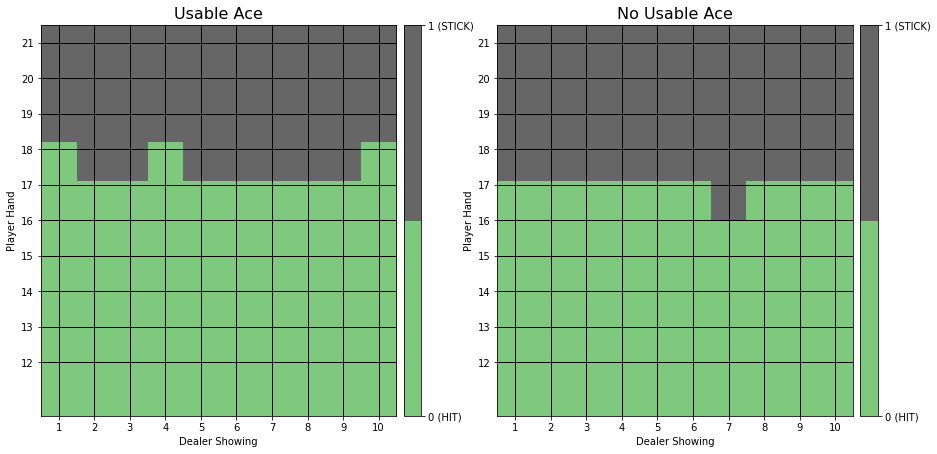

In [9]:
plotting.plot_policy(policy )

In [14]:
from agents import dynaq

In [15]:
# Start the stopwatch / counter  
t1_start = process_time() 

agent_DynaQ = dynaq.DynaQ()
agent_DynaQ.actions = [0,1]
agent_DynaQ.initialize_state_actions( ) 

In [16]:
i=30
# num_episodes=50000
for i_episode in range(1, num_episodes + 1):
    if i_episode % 100 == 0:
        print("\rEpisode {}/{}.".format(i_episode, num_episodes), end="")
        #sys.stdout.flush()
    agent_DynaQ.control()
    

    

    
t1_stop = process_time() 
   
print("Elapsed time:", t1_stop, t1_start) 
print("Elapsed time during the whole program in seconds:", 
                                         t1_stop-t1_start) 

Episode 200000/200000.Elapsed time: 4563.25 2217.921875
Elapsed time during the whole program in seconds: 2345.328125


In [17]:
agent_DynaQ.save('model_output/final_DynaQ_vals.pkl')

In [18]:
agent_DynaQ.load('model_output/final_DynaQ_vals.pkl')
V_DynaQ = agent_DynaQ.Q_vals
# V_DynaQ

In [19]:

V = defaultdict(float)
for state, actions in V_DynaQ.items():
    
    action_value = np.max( list(actions.values()))
    V[state] = action_value
# V
#plot_value_function(V, title="Optimal Value Function")

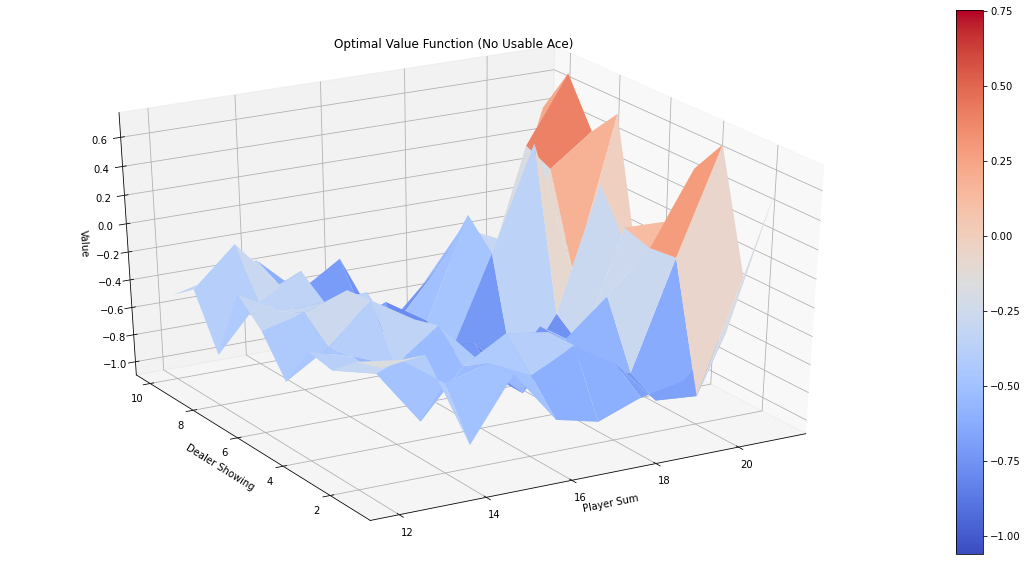

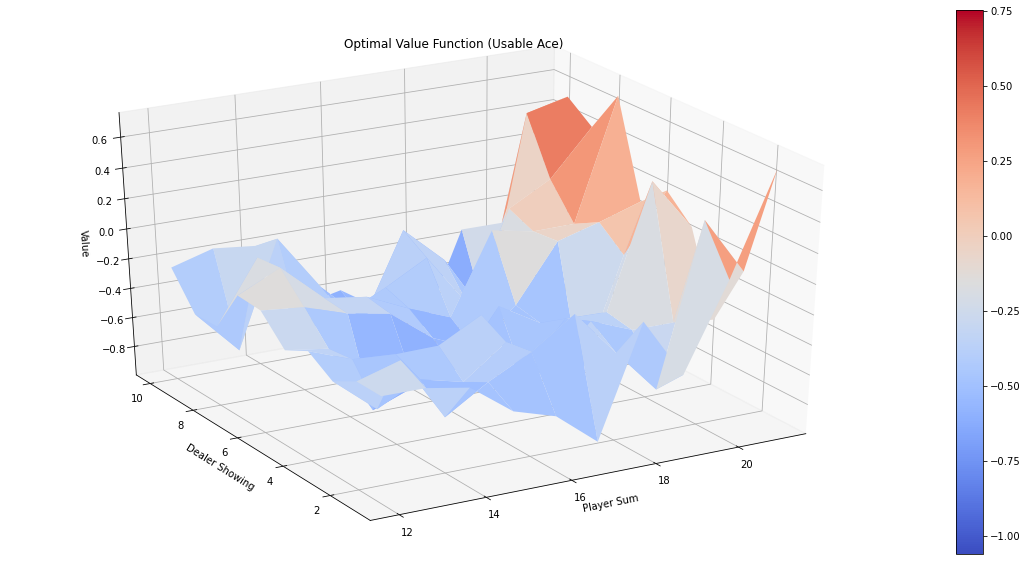

In [20]:
plotting.plot_value_function(V, title="Optimal Value Function")

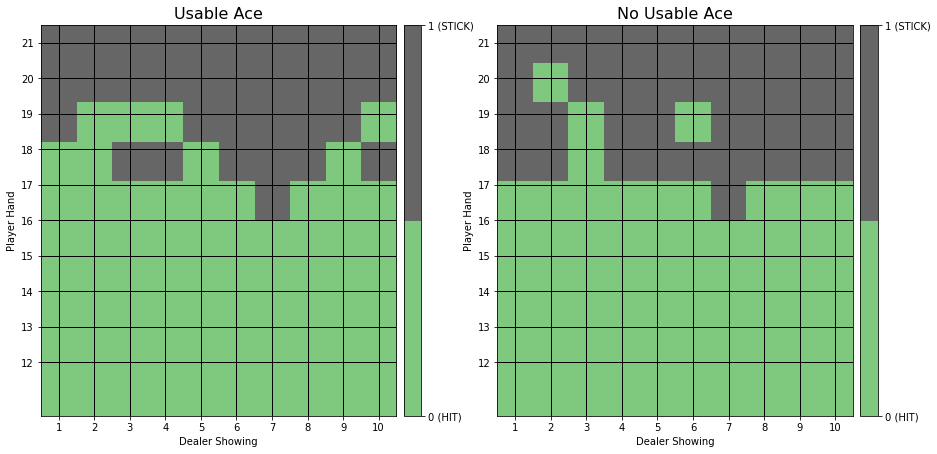

In [21]:
policy = dict((state,  np.argmax( list(action.values()))) for state, action in agent_DynaQ.Q_vals.items())

plotting.plot_policy(policy )

In [22]:
#player_cards

In [8]:
batch_size = 3
n_episodes = num_episodes
output_dir = 'model_output/'

In [9]:
import numpy as np
import tensorflow as tf

In [10]:
from agents import dqn

Using TensorFlow backend.


In [11]:
t1_start = process_time() 
agent = dqn.DQNAgent(n_episodes,batch_size,output_dir,False) # initialise agent


In [12]:

agent.learning( )

t1_stop = process_time() 
   
print("Elapsed time:", t1_stop, t1_start) 
print("Elapsed time during the whole program in seconds:", 
                                         t1_stop-t1_start) 

agent.save(agent.output_dir + "final_weights.hdf5")

Populating replay memory...
Episode 199900/200000. ...0.5528035056070112Elapsed time: 6122.40625 2476.015625
Elapsed time during the whole program in seconds: 3646.390625


In [28]:
all_states = [(p_sum, d_sum, ace) for ace in  (True,False) for p_sum in range(12,23) for d_sum in range(1,23)]

agent.load(agent.output_dir + "final_weights.hdf5")

# all_states

In [29]:
all_actions = [0,1]
policy={}
for state in all_states:
    s =[]
    s.append(  state) 
    act_values = agent.q_estimator.predict(np.array(s))
#     print(np.argmax(act_values))
    for a in all_actions:
        policy.setdefault(state, {})[a] = act_values[0][a]
#         self.C_vals.setdefault(s, {})[a] = 0
#         self.π[s]=2


# s =[]
# s.append(  (12, 1, True)) 
# act_values = agent.q_estimator.predict(np.array(s))
# action=np.argmax(act_values[0])
# print(act_values)

In [30]:
#agent.q_estimator.get_weights()

In [31]:
# policy

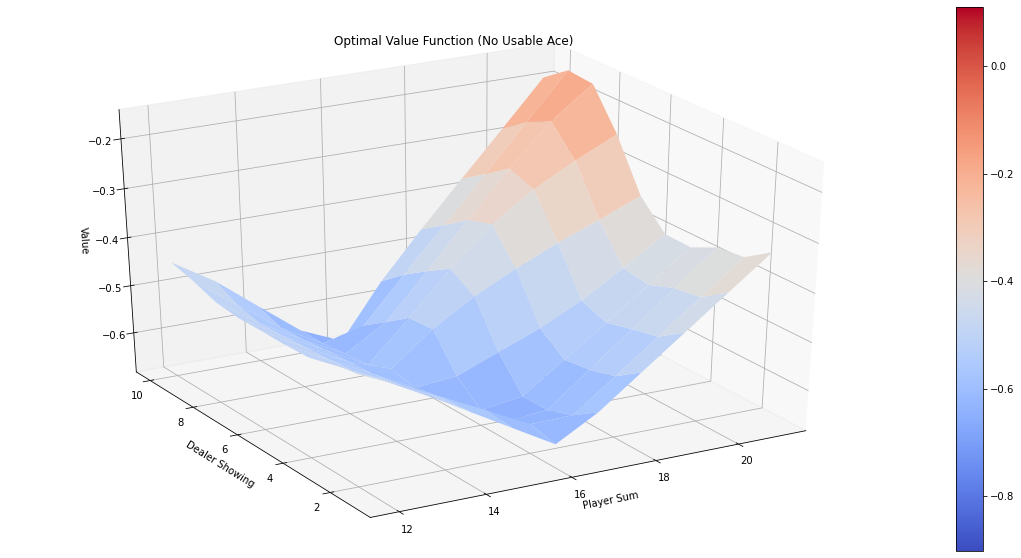

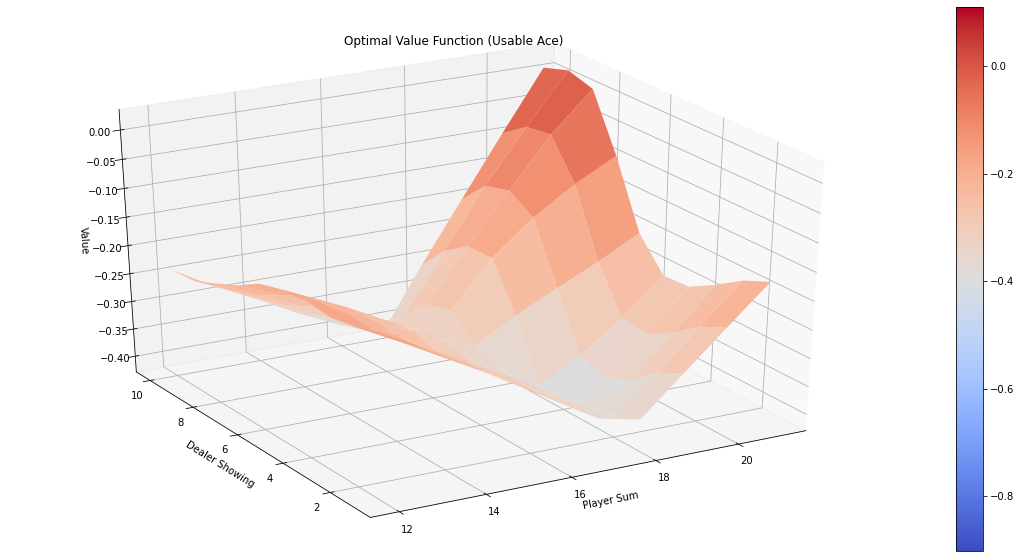

In [32]:
V = defaultdict(float)
for state, actions in policy.items():
#     print(state)
#     print(actions)
#     print(np.max( list(actions.values())))
    
    action_value = np.max( list(actions.values()))
#     print(action_value)
    V[state] = action_value
# print(V)
plotting.plot_value_function(V, title="Optimal Value Function")

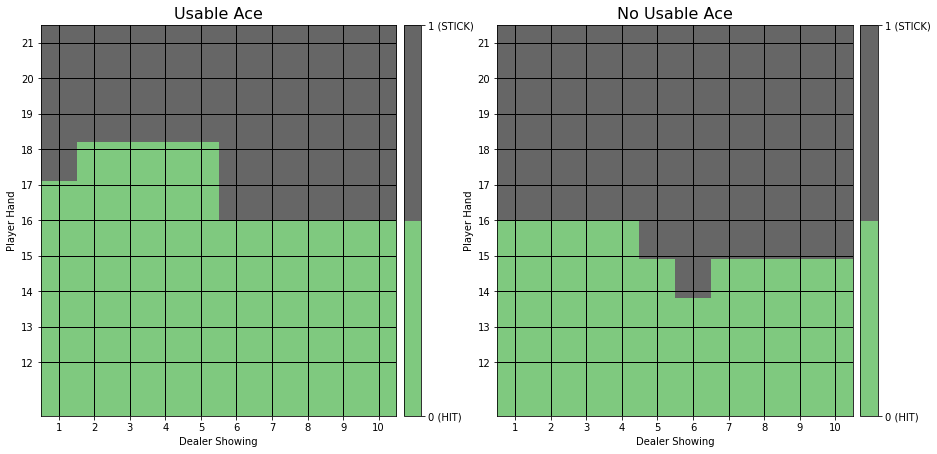

In [33]:
pl = dict((state,  np.argmax( list(action.values()))) for state, action in policy.items())

plotting.plot_policy(pl )

# Qlearning

In [13]:
# import numpy as np
# import matplotlib
# matplotlib.use('Agg')
# import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

import pandas as pd 

import sys
import random
import operator

from collections import defaultdict

from time import process_time 
from IPython.display import clear_output



# import matplotlib
import numpy as np
import pandas as pd
from collections import namedtuple

from lib import plotting

In [14]:
all_states = [(p_sum, d_sum, ace) for ace in  (True,False) for p_sum in range(12,23) for d_sum in range(1,23)]

In [15]:
from agents import qlearning

In [16]:
# Start the stopwatch / counter 
num_episodes=100000
t1_start = process_time() 
agent_qlearning = qlearning.QLearning()
agent_qlearning.actions = [0,1]
agent_qlearning.initialize_state_actions( ) 

epsilons = np.linspace(1 ,.1,150000)

for i_episode in range(1,num_episodes+1):
    epsilon = epsilons[min(i_episode, num_episodes-1)]
    if i_episode % 1 == 0:
        print("\rEpisode {}/{}.epsilon:{}".format(i_episode, num_episodes,epsilon), end="")
        sys.stdout.flush()
    agent_qlearning.control(epsilon)
agent_qlearning.Q_vals.popitem()
agent_qlearning.Q_vals.popitem()

    

    
t1_stop = process_time() 
   
print("Elapsed time:", t1_stop, t1_start) 
print("Elapsed time during the whole program in seconds:", 
                                         t1_stop-t1_start) 

 

Episode 100000/100000.epsilon:0.4000020000133334Elapsed time: 2745.015625 1350.171875
Elapsed time during the whole program in seconds: 1394.84375


In [17]:
 
res =  {x:y for x,y in agent_qlearning.Q_vals.items() for z,c in y.items() if c!=0}
res

{(12, 1, True): {0: -4.662467316279826, 1: -4.879272763136381},
 (12, 1, False): {0: -7.352410177469348, 1: -7.140424464966154},
 (12, 2, True): {0: -4.636208397222528, 1: -4.659269062259418},
 (12, 2, False): {0: -7.312503517373704, 1: -5.8717230256410655},
 (12, 3, True): {0: -4.441119890790382, 1: -4.337666155505563},
 (12, 3, False): {0: -6.120868979327686, 1: -6.357102584988317},
 (12, 4, True): {0: -4.240181765907587, 1: -4.348832906742167},
 (12, 4, False): {0: -6.910353442867148, 1: -7.102684983359378},
 (12, 5, True): {0: -4.738046531288049, 1: -4.669411666667282},
 (12, 5, False): {0: -6.976415123590963, 1: -6.869606594735318},
 (12, 6, True): {0: -4.879924381768769, 1: -3.8080204484247693},
 (12, 6, False): {0: -6.0401741564159535, 1: -4.963684125827475},
 (12, 7, True): {0: -4.397029964467996, 1: -4.5807205674337945},
 (12, 7, False): {0: -5.589341970913383, 1: -6.5097575302944835},
 (12, 8, True): {0: -4.988996928516256, 1: -5.296120644162311},
 (12, 8, False): {0: -6.9139

In [18]:
agent_qlearning.save('model_output/final_QLearning_50K.pkl')

agent_qlearning.load('model_output/final_QLearning_50K.pkl')

In [19]:

V_agent_qlearning_50k =agent_qlearning.Q_vals


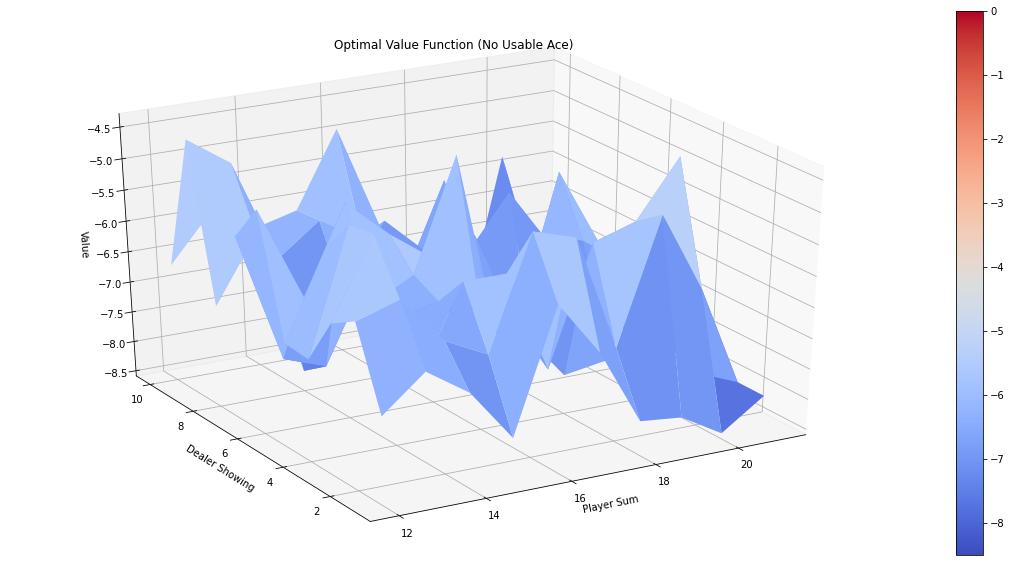

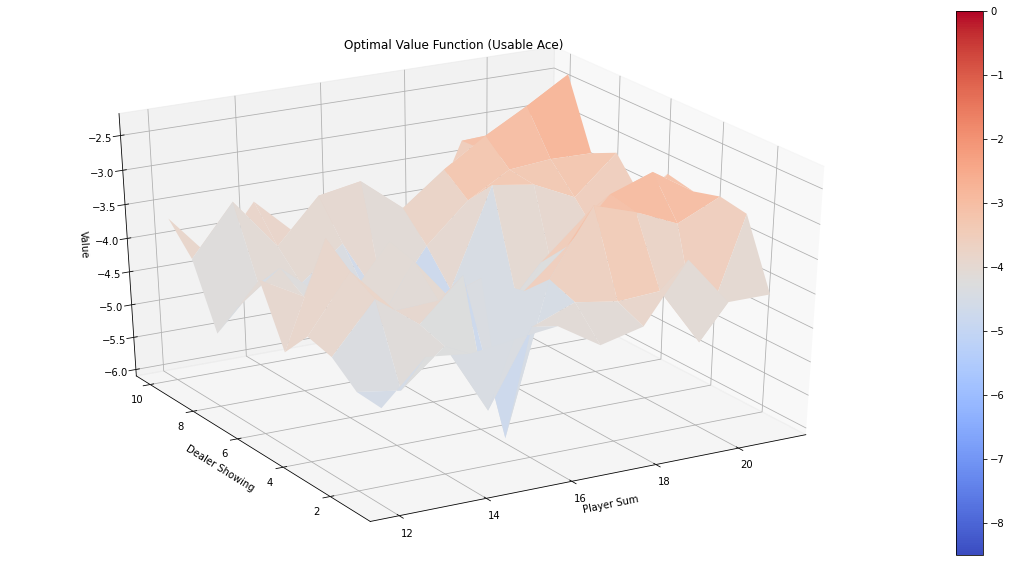

In [20]:
V = defaultdict(float)
for state, actions in V_agent_qlearning_50k.items():  
    action_value = np.max( list(actions.values()))
    V[state] = action_value
#     print("actions.values/state/action_value:{}/{}/{}".format(actions.values(),state,action_value))
# min_x = min(k[0] for k in V.keys())
# min_x
plotting.plot_value_function(V, title="Optimal Value Function")


In [21]:
policy = dict((state,  np.argmax( list(action.values()))) for state, action in agent_qlearning.Q_vals.items())

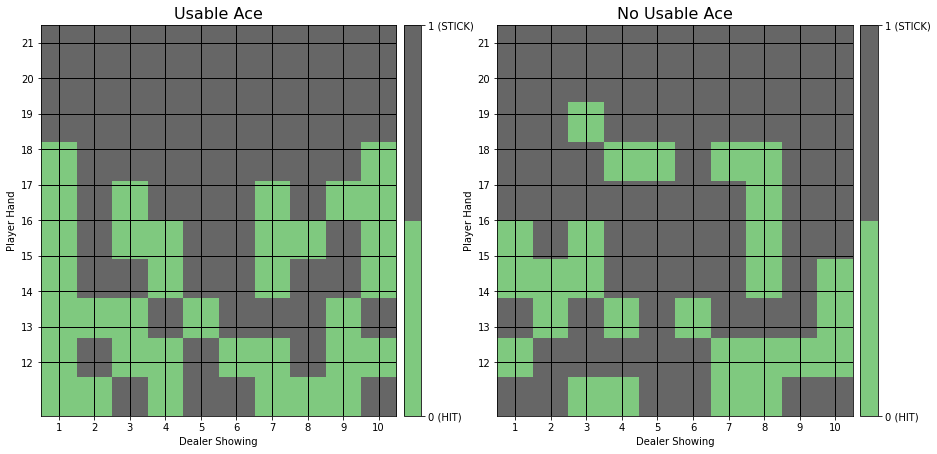

In [22]:
plotting.plot_policy(policy )

In [11]:
 all_states = [(p_sum, d_sum, ace) for ace in  (True,False) for p_sum in range(12,23) for d_sum in range(1,23)]

In [12]:
all_states

[(12, 1, True),
 (12, 2, True),
 (12, 3, True),
 (12, 4, True),
 (12, 5, True),
 (12, 6, True),
 (12, 7, True),
 (12, 8, True),
 (12, 9, True),
 (12, 10, True),
 (12, 11, True),
 (12, 12, True),
 (12, 13, True),
 (12, 14, True),
 (12, 15, True),
 (12, 16, True),
 (12, 17, True),
 (12, 18, True),
 (12, 19, True),
 (12, 20, True),
 (12, 21, True),
 (12, 22, True),
 (13, 1, True),
 (13, 2, True),
 (13, 3, True),
 (13, 4, True),
 (13, 5, True),
 (13, 6, True),
 (13, 7, True),
 (13, 8, True),
 (13, 9, True),
 (13, 10, True),
 (13, 11, True),
 (13, 12, True),
 (13, 13, True),
 (13, 14, True),
 (13, 15, True),
 (13, 16, True),
 (13, 17, True),
 (13, 18, True),
 (13, 19, True),
 (13, 20, True),
 (13, 21, True),
 (13, 22, True),
 (14, 1, True),
 (14, 2, True),
 (14, 3, True),
 (14, 4, True),
 (14, 5, True),
 (14, 6, True),
 (14, 7, True),
 (14, 8, True),
 (14, 9, True),
 (14, 10, True),
 (14, 11, True),
 (14, 12, True),
 (14, 13, True),
 (14, 14, True),
 (14, 15, True),
 (14, 16, True),
 (14, 1

In [3]:
len(all_states)

484